In [ ]:
##performed analysis on a breast cancer dataset gotten from CBioPortal, and developed 4 supervised learning models to predict
##if a patient has breast cancer based on some of the features available.

In [163]:
from scipy.stats import pearsonr
import pandas as pd

df = pd.read_excel('clinical.xlsx')
# df.head()
# df.isna()
# print(df)
# newdf= df.dropna()
# print("The length is: ",len(df))
# print("The length is: ",len(newdf))
# newdf.isna()

print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 1 to 1743
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Study ID                       1092 non-null   object  
 1   Patient ID                     1092 non-null   object  
 2   Sample ID                      1092 non-null   object  
 3   Age at Diagnosis               1092 non-null   float64 
 4   Type of Breast Surgery         1092 non-null   object  
 5   Cellularity                    1092 non-null   int8    
 6   Chemotherapy                   1092 non-null   object  
 7   ER Status                      1092 non-null   int8    
 8   Neoplasm Histologic Grade      1092 non-null   float64 
 9   HER2 Status                    1092 non-null   int8    
 10  Hormone Therapy                1092 non-null   int8    
 11  Inferred Menopausal State      1092 non-null   int8    
 12  Primary Tumor Laterality       109

In [164]:
newdf.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,...,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,0,NO,1,3.0,0,...,1,83.52,0,1,Primary,Female,2.615035,10.0,1.0,1
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,0,YES,1,3.0,0,...,1,18.55,1,1,Primary,Female,2.615035,40.0,2.0,0
5,brca_metabric,MB-0010,MB-0010,78.77,MASTECTOMY,2,NO,1,3.0,0,...,1,2.89,1,1,Primary,Female,5.230071,31.0,4.0,0
10,brca_metabric,MB-0028,MB-0028,86.41,BREAST CONSERVING,2,NO,1,3.0,0,...,1,36.09,0,1,Primary,Female,5.230071,16.0,2.0,0
11,brca_metabric,MB-0035,MB-0035,84.22,MASTECTOMY,0,NO,1,2.0,0,...,0,35.79,1,1,Primary,Female,6.537589,28.0,2.0,0


In [165]:
from numpy import cov

covariance = cov(newdf['Age at Diagnosis'], newdf['Tumor Size'])
print(covariance)

[[169.02419352  12.61950325]
 [ 12.61950325 225.37631298]]


In [166]:
from scipy.stats import pearsonr

corr, _ = pearsonr(newdf['Age at Diagnosis'], newdf['Tumor Size'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.065


In [167]:
from scipy.stats import spearmanr

corr, _ = spearmanr(newdf['Age at Diagnosis'], newdf['Tumor Size'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.124


In [168]:
from scipy.stats import spearmanr

corr, _ = spearmanr(newdf['Age at Diagnosis'], newdf['ER Status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.211


In [106]:
newdf=newdf.drop(['Cancer Type', 'Cancer Type Detailed', 'Pam50 + Claudin-low subtype', 
                  'ER status measured by IHC', 'Cohort','HER2 status measured by SNP6','Tumor Other Histologic Subtype',
                  'Integrative Cluster', 'Oncotree Code','3-Gene classifier subtype'], axis=1)

In [127]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

newdf["Overall Survival Status"] = newdf["Overall Survival Status"].astype('category')
newdf.dtypes

Study ID                           object
Patient ID                         object
Sample ID                          object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cellularity                          int8
Chemotherapy                       object
ER Status                            int8
Neoplasm Histologic Grade         float64
HER2 Status                          int8
Hormone Therapy                      int8
Inferred Menopausal State            int8
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Overall Survival (Months)         float64
Overall Survival Status          category
PR Status                            int8
Radio Therapy                        int8
Relapse Free Status (Months)      float64
Relapse Free Status              category
Number of Samples Per Patient       int64
Sample Type                       

In [129]:
newdf["Overall Survival Status"]= newdf["Overall Survival Status"].cat.codes

In [130]:
newdf["Overall Survival Status"]

1       0
4       1
5       1
10      1
11      1
       ..
1697    1
1698    0
1700    1
1702    0
1743    0
Name: Overall Survival Status, Length: 1092, dtype: int8

In [169]:
len(newdf.columns)

29

In [111]:
newdf["Patient's Vital Status"] = newdf["Patient's Vital Status"].replace(['Died of Other Causes'],'Dead')

In [132]:
newdf["Patient's Vital Status"]

1       1
4       0
5       0
10      0
11      0
       ..
1697    0
1698    1
1700    0
1702    1
1743    1
Name: Patient's Vital Status, Length: 1092, dtype: int8

In [170]:
#select features
feature = newdf[['Age at Diagnosis', 'Mutation Count', 'ER Status', 'HER2 Status', 
                 'Tumor Size', 'Tumor Stage', "TMB (nonsynonymous)", 'Cellularity', 
                 'Nottingham prognostic index', 'Hormone Therapy', 'Inferred Menopausal State', 
                 'PR Status' ,'Radio Therapy', 'Relapse Free Status', 'Lymph nodes examined positive']]
    


# Select Target
target = newdf['Overall Survival Status']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.25, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
# print('Shape of training label:', y_train.shape)
# print('Shape of testing label:', y_test.shape)

Shape of training feature: (819, 15)
Shape of testing feature: (273, 15)


In [171]:
#function to evaluate each trained model
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [172]:
#Building Decision Tree Model
from sklearn import tree

dtc =  tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [173]:
#Model Evaluation
dtc_eval = evaluate_model(dtc, X_test, y_test)

print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7545787545787546
Precision: 0.756578947368421
Recall: 0.7931034482758621
F1 Score: 0.7744107744107743
Cohens Kappa Score: 0.5056620091348882
Area Under Curve: 0.752020474137931
Confusion Matrix:
 [[ 91  37]
 [ 30 115]]


In [174]:
#Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [175]:
rf_eval = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8278388278388278
Precision: 0.8266666666666667
Recall: 0.8551724137931035
F1 Score: 0.840677966101695
Cohens Kappa Score: 0.6535439449169704
Area Under Curve: 0.8810883620689655
Confusion Matrix:
 [[102  26]
 [ 21 124]]


In [176]:
#Building Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [177]:
nb_eval = evaluate_model(nb, X_test, y_test)

print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.73992673992674
Precision: 0.7890625
Recall: 0.696551724137931
F1 Score: 0.73992673992674
Cohens Kappa Score: 0.48186265337218315
Area Under Curve: 0.8258620689655173
Confusion Matrix:
 [[101  27]
 [ 44 101]]


In [178]:
#Building K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [179]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.706959706959707
Precision: 0.7044025157232704
Recall: 0.7724137931034483
F1 Score: 0.7368421052631577
Cohens Kappa Score: 0.40784122336098916
Area Under Curve: 0.7314924568965516
Confusion Matrix:
 [[ 81  47]
 [ 33 112]]


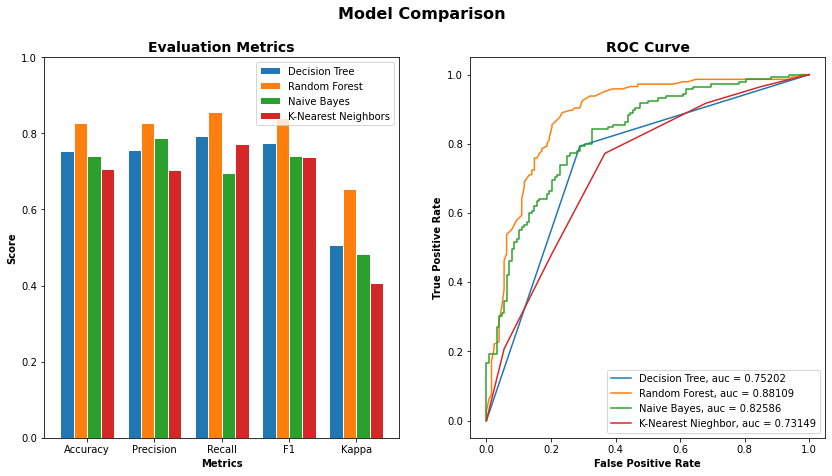

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [1]:
import pandas as pd

corr = newdf.corr()
corr.style.background_gradient(cmap='coolwarm')
# plt.savefig("Correlation Heatmap.jpg")


NameError: name 'newdf' is not defined

In [182]:
savedf = df.dropna()

In [157]:
savedf.to_excel(r'C:\Users\Dami\Documents\new_cancer.xlsx')